In [1]:
from torch import tensor, tanh, sum
from matplotlib import pyplot as plt

import matplotlib
import torchviz

trainx = [ [0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0] ]
trainy = [ 0.0, 1.0, 1.0, 1.0 ]


inputs = tensor(trainx)
weights = tensor([2.0, 2.0], requires_grad=True)
bias = tensor([0.1], requires_grad=True)
parameters = [ weights, bias ]

stats = []

[[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]] 
 [0.0, 1.0, 1.0, 1.0] 
 tensor([2.5536e-04, 9.9200e-01, 9.9200e-01, 9.9997e-01],
       grad_fn=<TanhBackward0>) 
 tensor([ 2.5536e-04, -8.0041e-03, -8.0041e-03, -3.2306e-05],
       grad_fn=<SubBackward0>) 
 tensor([6.5210e-08, 6.4066e-05, 6.4066e-05, 1.0437e-09],
       grad_fn=<PowBackward0>) 
 tensor(0.0001, grad_fn=<SumBackward0>) 
 tensor([2.7582, 2.7582], requires_grad=True) 
 tensor([0.0003], requires_grad=True)
tensor([-0.0003, -0.0003])
tensor([2.4292e-07])


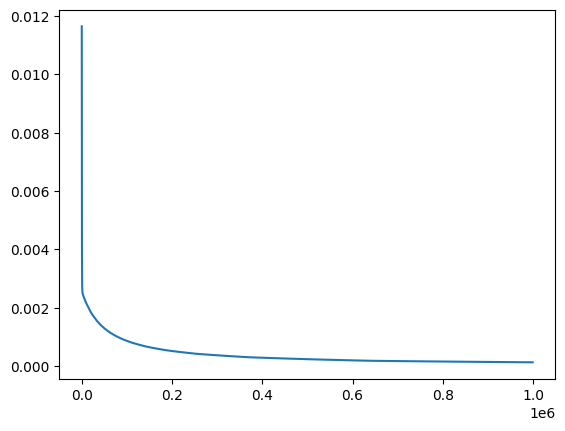

In [2]:

for i in range(10000):
    linear = inputs @ weights + bias
    nonlinear = tanh(linear)
    loss1 = nonlinear - tensor(trainy)
    loss2 = loss1**2
    loss3 = sum(loss2)
    if i % 1000:
        stats.append(loss3.data)

    for p in parameters:
        p.grad = None


    loss3.backward()
    lr = 0.001
    for p in parameters:
        p.data = p.data - (lr * p.grad.data)

print( trainx, "\n", trainy, "\n", nonlinear, "\n", loss1, "\n", loss2, "\n", loss3, "\n", weights, "\n", bias )
for p in parameters:
    print(p.grad)
plt.plot(stats)